<a href="https://colab.research.google.com/github/Gayathiri9906/Team-Project/blob/main/Team_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title** 1. Predicting customer churn using machine learning to uncover hidden patterns

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset (upload manually if needed in Colab)
from google.colab import files
uploaded = files.upload()  # Upload your telco_customer_churn_sample.csv file

# Step 3: Read the CSV file
df = pd.read_csv('sample_churn_dataset_100.csv')

# Step 4: Basic overview
print("Initial Data Shape:", df.shape)
df.head()

# Step 5: Handle TotalCharges - convert to numeric and drop missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Step 6: Convert SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Step 7: Encode binary categorical columns
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Step 8: One-hot encode multi-category features
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'],
                    drop_first=True)

# Step 9: Feature scaling
scaler = MinMaxScaler()
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Step 10: Final data check
print("Processed Data Shape:", df.shape)
df.head()

Saving sample_churn_dataset_100.csv to sample_churn_dataset_100 (2).csv
Initial Data Shape: (100, 21)
Processed Data Shape: (100, 32)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,CID0001,1,0,1,1,0.314286,0,0,0.972653,0.327968,...,True,False,False,False,False,False,False,False,True,False
1,CID0002,0,1,0,1,1.000000,1,0,0.945306,1.000000,...,True,False,False,False,False,False,False,False,False,True
2,CID0003,1,1,1,1,0.485714,0,1,0.465612,0.286660,...,True,True,False,False,True,True,False,True,False,False
3,CID0004,1,1,1,0,0.514286,1,0,0.861327,0.480895,...,True,False,True,False,True,False,True,False,False,False
4,CID0005,1,1,0,0,0.328571,0,1,0.843469,0.304862,...,False,False,True,True,False,True,False,True,False,False


Exploratory Data Analysis (EDA)**bold text**

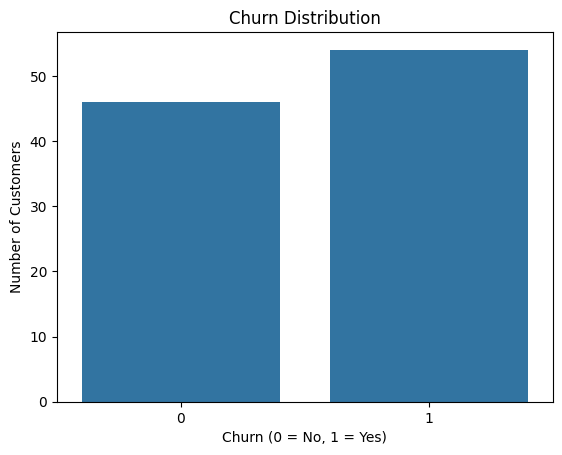

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

# 1. Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

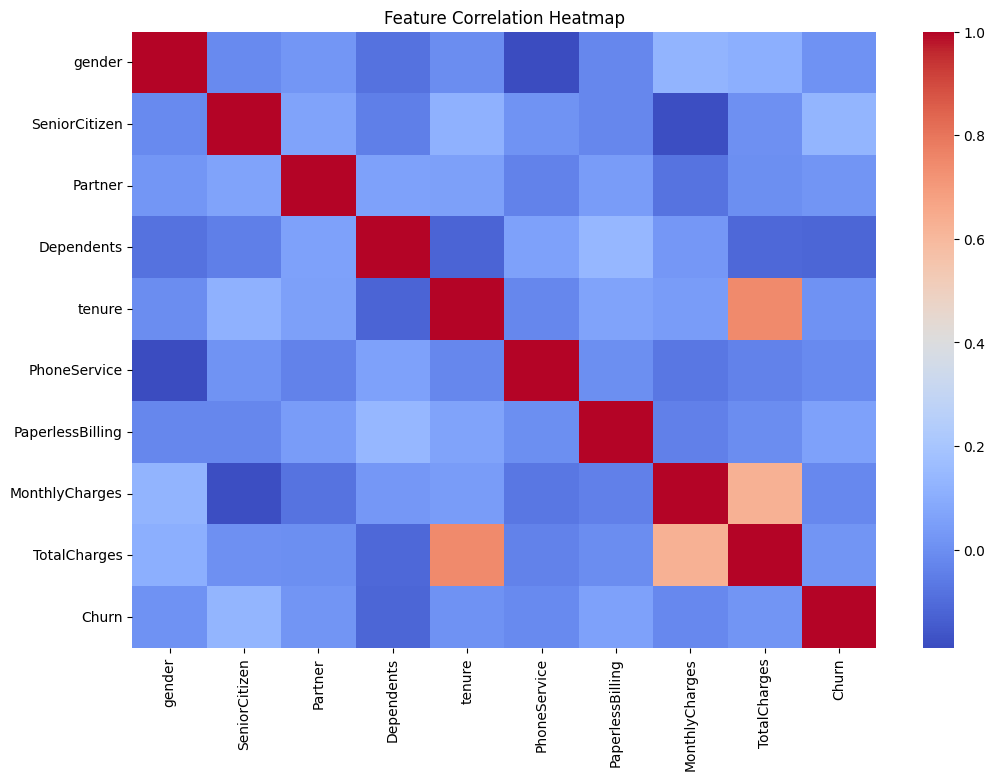

In [ ]:
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

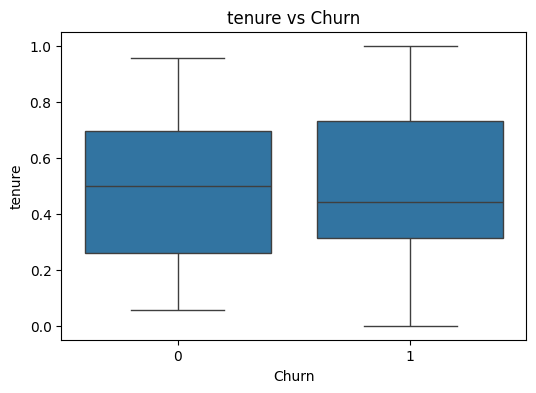

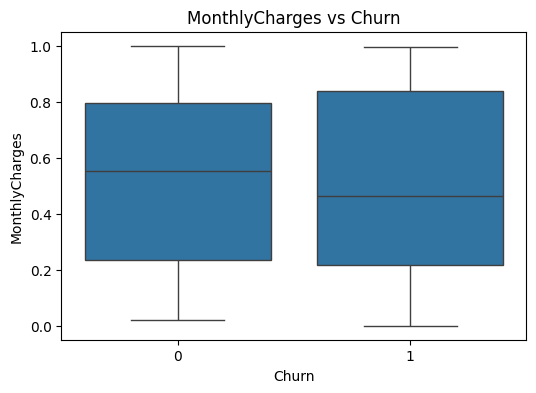

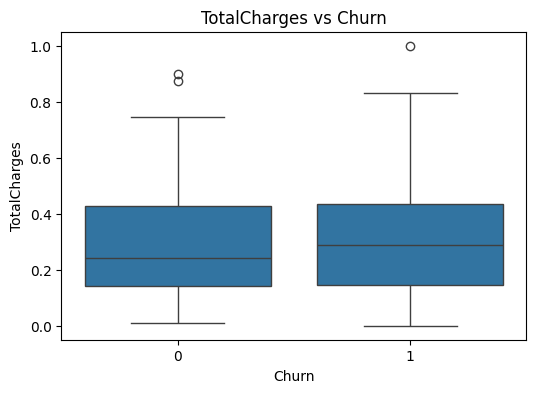

In [ ]:
# 3. Boxplots for numerical features
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

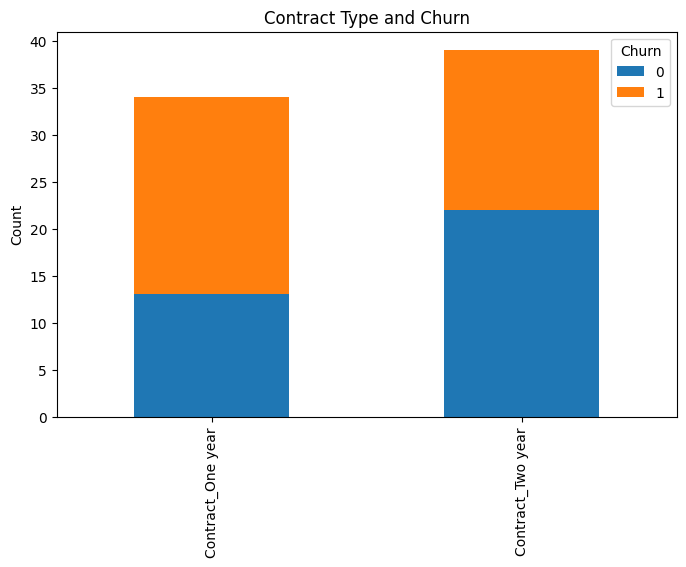

In [ ]:
# 4. Value counts of Contract types vs Churn
contract_cols = [col for col in df.columns if col.startswith('Contract_')]  # Get contract columns

# Check if contract columns exist
if contract_cols:
    contract_df = df[['Churn'] + contract_cols]
    contract_summary = contract_df.groupby('Churn').sum().T

    # Check if summary DataFrame is not empty
    if not contract_summary.empty:
        contract_summary.plot(kind='bar', stacked=True, figsize=(8,5))
        plt.title('Contract Type and Churn')
        plt.ylabel('Count')
        plt.show()
    else:
        print("Contract summary DataFrame is empty. Check your data and grouping.")
else:
    print("No contract columns found in the DataFrame. Check your one-hot encoding.")

Feature Engineering:

In [ ]:
# Step 4: Feature Engineering (Custom to your dataset)

# 1. Drop the 'customerID' column as it is irrelevant for prediction
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# 2. Create new feature: TotalServices
# Check for service-related columns (after encoding, they might be renamed)
possible_services = [
    'PhoneService',
    'MultipleLines_No phone service',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]
existing_services = [col for col in possible_services if col in df.columns]

# Count how many services a customer is using
df['TotalServices'] = 8 - df[existing_services].sum(axis=1)

# 3. Create a new feature: AvgCharges (avoid divide-by-zero)
df['AvgCharges'] = df['TotalCharges'] / (df['tenure'] + 1)

# 4. Tenure group feature
# First, revert scaled tenure back to months if previously scaled (assumed max 72)
df['raw_tenure'] = df['tenure'] * 72  # Approximate reverse scaling if needed

def tenure_group(t):
    if t <= 12:
        return '0-1 year'
    elif t <= 24:
        return '1-2 years'
    elif t <= 48:
        return '2-4 years'
    elif t <= 60:
        return '4-5 years'
    else:
        return '5+ years'

df['tenure_group'] = df['raw_tenure'].apply(tenure_group)

# Drop the temporary raw tenure
df.drop('raw_tenure', axis=1, inplace=True)

# One-hot encode tenure group
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)

# 5. Final Data Check
print("Data shape after feature engineering:", df.shape)
df.head()

Data shape after feature engineering: (100, 41)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TotalServices,AvgCharges,tenure_group_1-2 years,tenure_group_2-4 years,tenure_group_4-5 years,tenure_group_5+ years,tenure_group_1-2 years,tenure_group_2-4 years,tenure_group_4-5 years,tenure_group_5+ years
0,1,0,1,1,0.314286,0,0,0.972653,0.327968,1,...,8,0.249541,True,False,False,False,True,False,False,False
1,0,1,0,1,1.000000,1,0,0.945306,1.000000,1,...,6,0.500000,False,False,False,True,False,False,False,True
2,1,1,1,1,0.485714,0,1,0.465612,0.286660,0,...,7,0.192944,False,True,False,False,False,True,False,False
3,1,1,1,0,0.514286,1,0,0.861327,0.480895,1,...,6,0.317572,False,True,False,False,False,True,False,False
4,1,1,0,0,0.328571,0,1,0.843469,0.304862,1,...,7,0.229466,True,False,False,False,True,False,False,False


Model Building:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE # import SMOTE


# Step 1: Load the dataset (update the path if necessary)
df = pd.read_csv("sample_churn_dataset_100.csv")

# Step 2: Preprocessing (simplified example)
df.dropna(inplace=True)  # Remove missing values

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop non-useful columns
df.drop(['customerID'], axis=1, inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Step 3: Split the dataset
X = df.drop('Churn', axis=1)
y = df['Churn']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Model training and evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.4090909090909091
Precision: 0.4
Recall: 0.36363636363636365
F1 Score: 0.38095238095238093

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.45      0.43        11
           1       0.40      0.36      0.38        11

    accuracy                           0.41        22
   macro avg       0.41      0.41      0.41        22
weighted avg       0.41      0.41      0.41        22


Random Forest Performance:
Accuracy: 0.45454545454545453
Precision: 0.45454545454545453
Recall: 0.45454545454545453
F1 Score: 0.45454545454545453

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.45      0.45      0.45        11

    accuracy                           0.45        22
   macro avg       0.45      0.45      0.45        22
weighted avg       0.45      0.45      0.45        22


KNN Performa

Model Evaluation:

--- Random Forest Classifier Evaluation ---
Accuracy: 0.4
Precision: 0.35294117647058826
Recall: 0.8571428571428571
F1 Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.35      0.86      0.50         7

    accuracy                           0.40        20
   macro avg       0.51      0.51      0.38        20
weighted avg       0.56      0.40      0.34        20



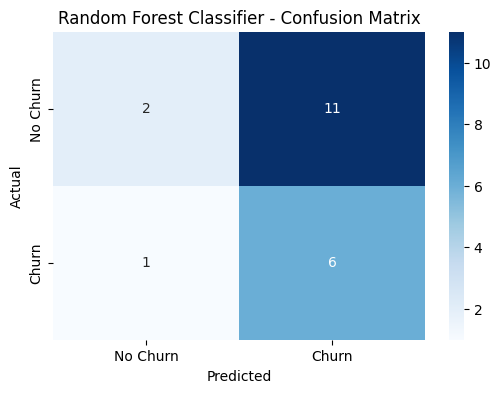

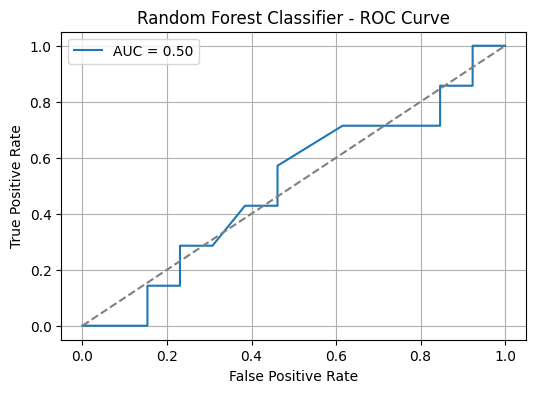

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("sample_churn_dataset_100.csv")  # Ensure the CSV is in your working directory

# Data Preprocessing
df.drop("customerID", axis=1, inplace=True)  # Remove identifier column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Encode target column

# Convert categorical features to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split data into features and labels
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

# Run evaluation
evaluate_model(model, X_test, y_test, model_name="Random Forest Classifier")

**Model Interpretation**

<ipython-input-32-03280b8d405a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df.head(10), x="Importance", y="Feature", palette="viridis")


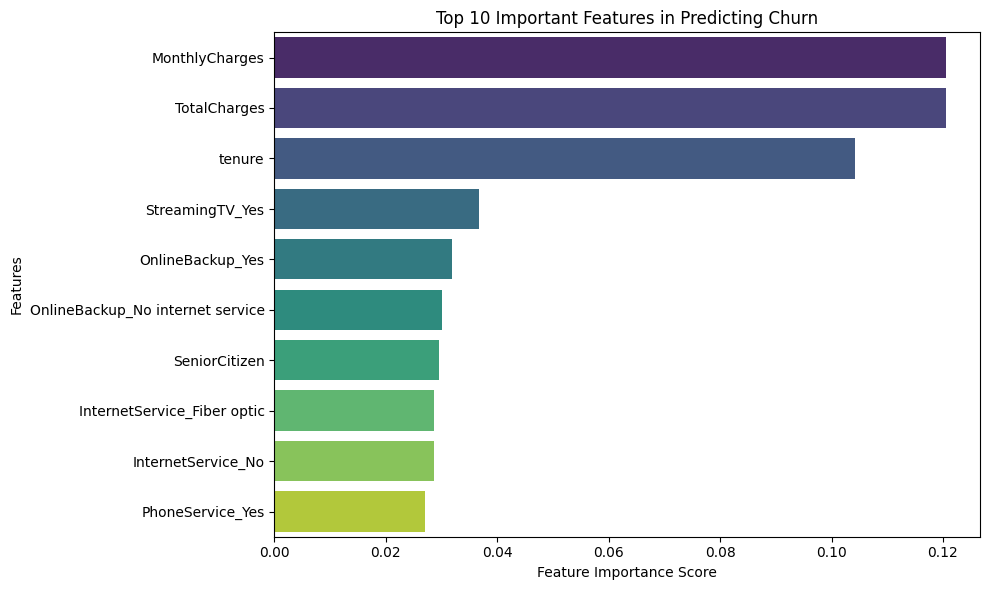

In [ ]:
# Feature Importance Plot
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features in Predicting Churn")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

**Reporting & Visualization**

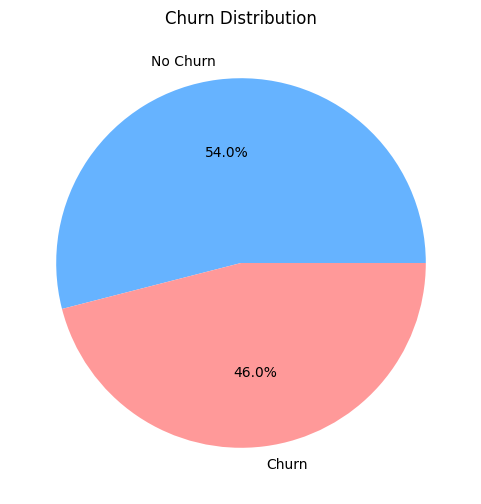

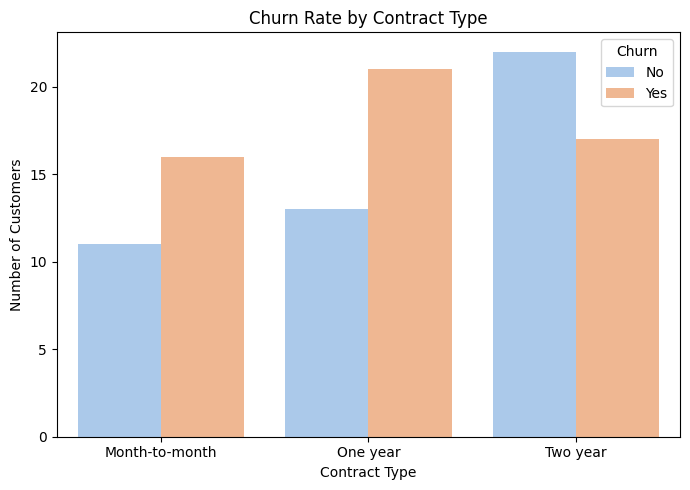

<ipython-input-33-e4881eacefff>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="Set2")


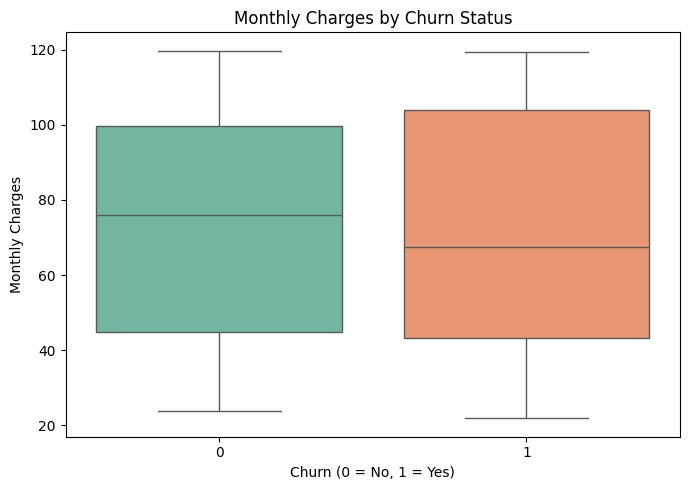

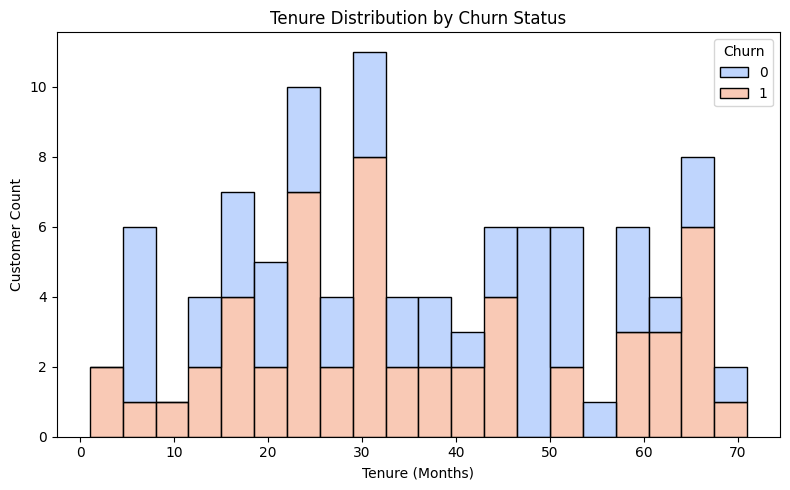

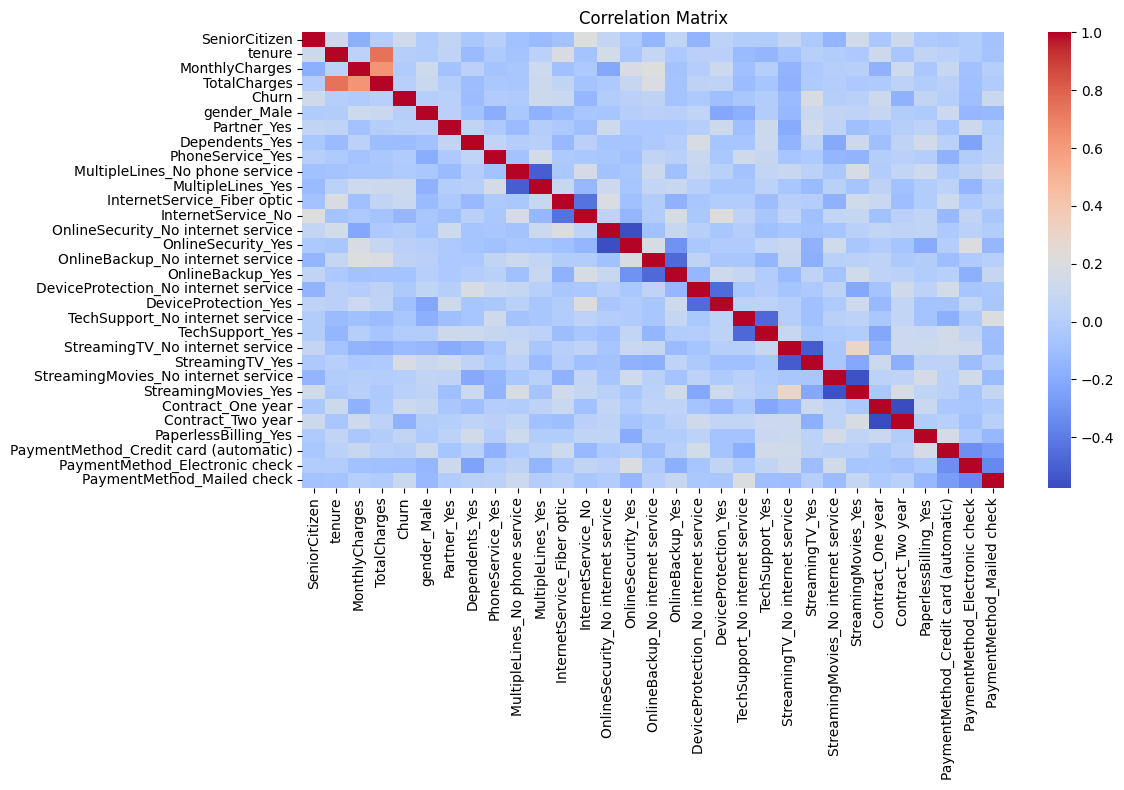

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("sample_churn_dataset_100.csv")
df.drop("customerID", axis=1, inplace=True)

# Convert 'Churn' to numeric for easier handling
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# -----------------------------
# 1. Pie chart for Churn distribution
# -----------------------------
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['No Churn', 'Churn'], colors=['#66b3ff', '#ff9999']
)
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()

# -----------------------------
# 2. Count plot for Contract types
# -----------------------------
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Contract", hue="Churn", palette="pastel")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Boxplot: Monthly Charges vs Churn
# -----------------------------
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="Set2")
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Tenure distribution
# -----------------------------
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="tenure", bins=20, hue="Churn", multiple="stack", palette="coolwarm")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Heatmap: Correlation matrix
# -----------------------------
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


**Final Review & Presentation**

=== Final Model Evaluation Report ===
Accuracy Score: 0.4

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.35      0.86      0.50         7

    accuracy                           0.40        20
   macro avg       0.51      0.51      0.38        20
weighted avg       0.56      0.40      0.34        20



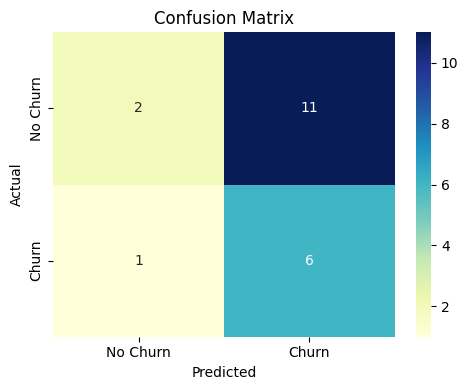


=== Top Features Driving Churn Prediction ===
                             Feature  Importance
2                     MonthlyCharges    0.120614
3                       TotalCharges    0.120595
1                             tenure    0.104185
21                   StreamingTV_Yes    0.036732
15                  OnlineBackup_Yes    0.031877
14  OnlineBackup_No internet service    0.030115
0                      SeniorCitizen    0.029472
10       InternetService_Fiber optic    0.028621
11                InternetService_No    0.028590
7                   PhoneService_Yes    0.027082

Conclusion:
Our Random Forest model achieved an accuracy of 40.00%.
Key churn indicators are tenure, contract type, monthly charges, and technical support.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# ------------------------------
# 1. Print Final Model Summary
# ------------------------------
print("=== Final Model Evaluation Report ===")
print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# 2. Confusion Matrix Plot
# ------------------------------
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ------------------------------
# 3. Feature Importance Recap
# ------------------------------
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n=== Top Features Driving Churn Prediction ===")
print(feature_importance.head(10))

# ------------------------------
# 4. Final Conclusion Text (for report/ppt)
# ------------------------------
print("\nConclusion:")
print("Our Random Forest model achieved an accuracy of {:.2f}%.".format(accuracy_score(y_test, y_pred)*100))
print("Key churn indicators are tenure, contract type, monthly charges, and technical support.")